# Code to detect lane lines in an image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg

# Read and show the image

(1536, 2048, 3)

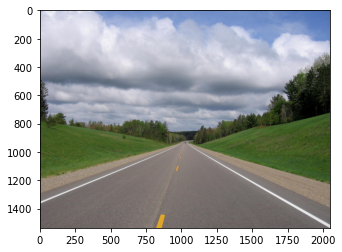

In [2]:
image_c = mpimg.imread('image_lane.jpg')
plt.imshow(image_c)
image_c.shape

   # Convert to gray scale

(1536, 2048)

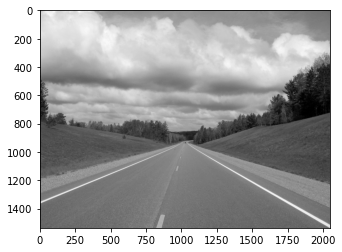

In [4]:
image_g = cv2.cvtColor(image_c, cv2.COLOR_RGB2GRAY)
plt.imshow(image_g, cmap = 'gray')
image_g.shape

 # Caussian Blurring and Canny

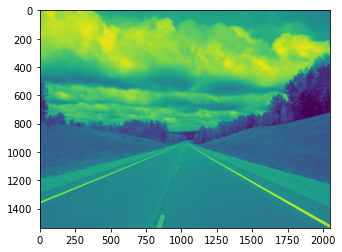

In [5]:
image_blurred = cv2.GaussianBlur(image_g, (7, 7), 0)
plt.imshow(image_blurred)

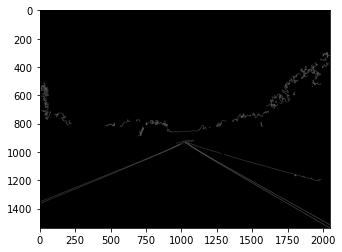

In [8]:
threshold_low = 10
threshold_high = 200
image_canny = cv2.Canny(image_blurred, threshold_low, threshold_high)
plt.imshow(image_canny, cmap = 'gray')

# Define the region of interest

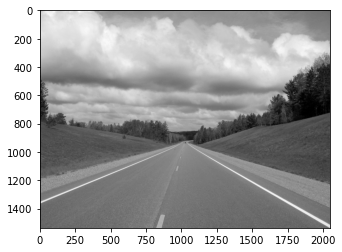

In [16]:
image_color = cv2.imread('image_lane.jpg')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')

In [17]:
# Select points of the region of interest(ROI)
ROI = np.array([[(0, 1530), (1000, 900), (1100, 900), (2048, 1530)]], dtype = np.int32)
# define a blank image with all zeros(ie: black)
blank = np.zeros_like(image_gray)
# Fill the Region of interest with white color(ie: 255)
mask = cv2.fillPoly(blank, ROI, 255)
# Perform bitwise AND operation to select only the region of itnerest
masked_image = cv2.bitwise_and(image_gray, mask)

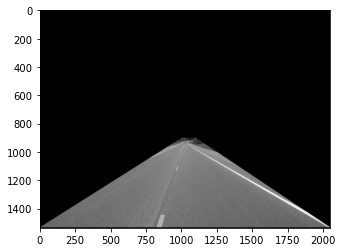

In [18]:
plt.imshow(masked_image, cmap = 'gray')

# Hough lines detection and draw function

In [22]:
rho = 2 # distance resolution in pixels
theta = np.pi/180 # angular resolution in radians
threshold = 40 # minimum number of votes
min_line_len = 100
max_line_gap = 50
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength = min_line_len, maxLineGap = max_line_gap)

# create an empty black iamge
line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype = np.uint8)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), [255, 0, 0], 20)   
lines

array([[[ 116, 1457, 1938, 1457]],

       [[ 122, 1453, 1932, 1453]],

       [[  33, 1509, 2016, 1509]],

       ...,

       [[ 955,  928, 1142,  928]],

       [[ 976,  915, 1115,  910]],

       [[1023,  924, 1127,  921]]], dtype=int32)

In [23]:
a = 1
b = 1
r = 0

# Resultant weighted iamge is calcualted as follows
Image_with_lines = cv2.addWeighted(image_c, a, line_image, b, r)

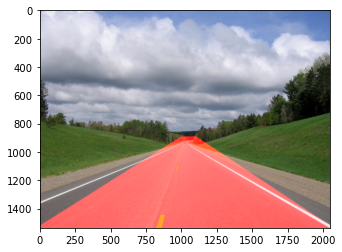

In [24]:
plt.figure()
plt.imshow(Image_with_lines)